<a href="https://colab.research.google.com/github/benson85560/yuanta/blob/main/TMBA_%5ETWII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

import datetime as dt
import time
from pandas.core.tools.datetimes import to_datetime
import math as m

path = os.getcwd()
print(path)

/content


In [ ]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#Colab安裝Talib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2022-10-24 07:44:06--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-10-24 07:44:06--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-10-24 07:44:06--  http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl.sour

In [ ]:
import talib 
from talib import abstract

In [ ]:
symbol = '^TWII' 
data = yf.Ticker(symbol)
df = data.history(period = "D", start = '2010-12-01', end = '2021-12-31')
df = df.drop(columns = ['Dividends', 'Stock Splits'])
df.columns = ['open', 'high', 'low', 'close', 'volume']

# Adding Indicator
df['ADX'] = abstract.ADX(df, timeperiod = 4)
df['PDI'] = abstract.PLUS_DI(df, timeperiod = 10) # positive DI
df['NDI'] = abstract.MINUS_DI(df, timeperiod = 10) # negative DI
df = df.loc['2011-01-01':]
df

,open,high,low,close,volume,ADX,PDI,NDI
Date,,,,,,,,
2011-01-03 00:00:00+08:00,9039.596627,9041.287050,8994.466910,9025.266602,5067400,46.815997,43.277070,11.412159
2011-01-04 00:00:00+08:00,9045.076972,9046.146304,8988.546907,8997.157227,5270400,52.856197,39.441249,11.311625
2011-01-05 00:00:00+08:00,9014.287474,9027.127271,8812.328249,8846.277344,5796600,50.095122,28.846950,30.309639
2011-01-06 00:00:00+08:00,8866.197329,8883.176758,8813.596940,8883.176758,4362200,48.024315,26.303925,27.637670
2011-01-07 00:00:00+08:00,8905.217324,8907.077669,8738.897622,8782.687500,4500800,51.301632,21.268499,30.849641
...,...,...,...,...,...,...,...,...
2021-12-24 00:00:00+08:00,17966.349609,18039.849609,17953.570312,17961.640625,3834800,33.926528,32.469175,18.287400
2021-12-27 00:00:00+08:00,17975.410156,18099.779297,17975.410156,18048.939453,3701200,43.105389,33.522126,16.523172
2021-12-28 00:00:00+08:00,18099.710938,18197.359375,18099.710938,18196.810547,3899900,52.438614,36.850048,14.816738


(736695.0, 737791.0)

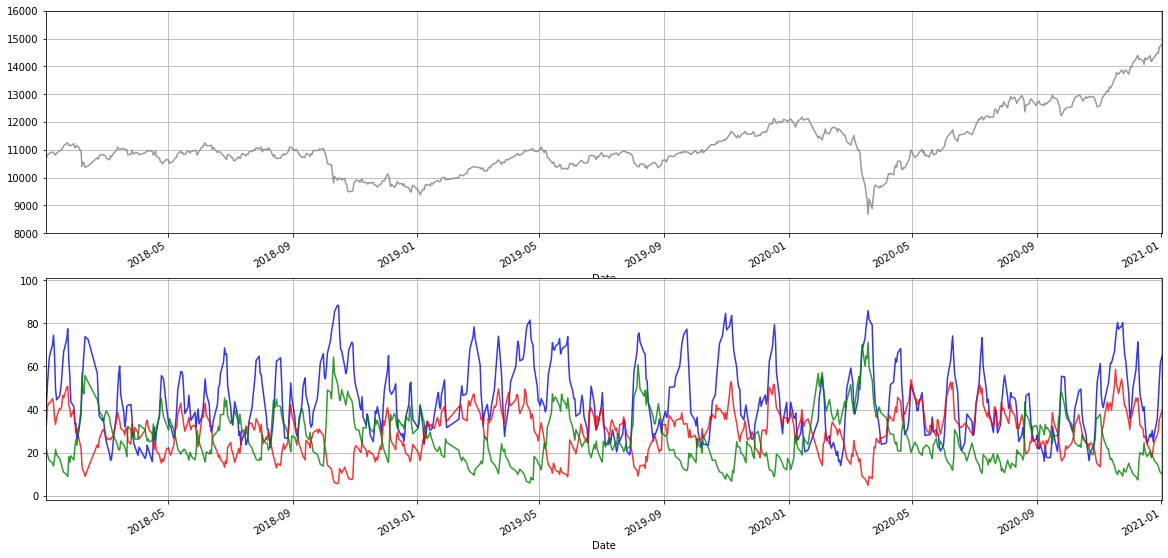

In [ ]:
# view data

fig, ax = plt.subplots(2, 1, figsize = (20,10))
df['close'].plot(label = 'close Price', ax = ax[0], c = 'gray', grid=True, alpha=0.8)
df['ADX'].plot(label = 'ADX', ax = ax[1], c = 'b', grid=True, alpha=0.8)
df['PDI'].plot(label = 'PDI', ax = ax[1], c = 'r', grid=True, alpha=0.8)
df['NDI'].plot(label = 'NDI', ax = ax[1], c = 'g', grid=True, alpha=0.8)

period = '2018-01-01', '2021-01-01'
price = 8000, 16000

ax[0].set_ylim(price)
ax[0].set_xlim(period)
ax[1].set_xlim(period)

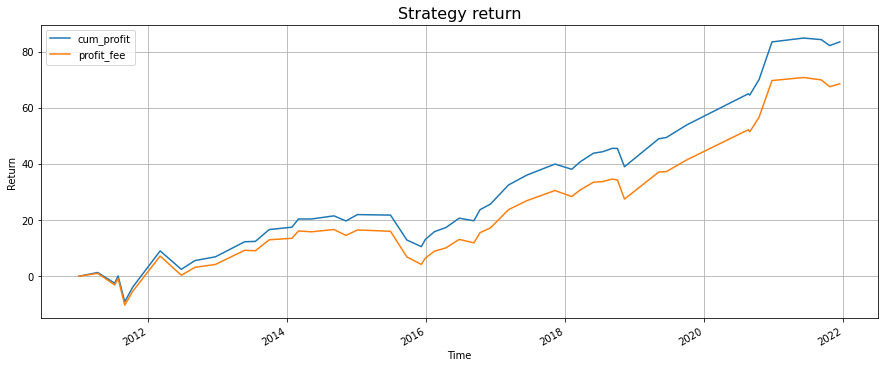

In [ ]:
# strategy

fund = 100 #初始有100元本金
money = 100 #每次投入100元
feeRate = 0.003

first = 0 ##除了第一筆之外，只紀錄出場的時間點
BS = None ##紀錄現在的狀態是做多還做空
stopEarn = 0
stopLoss = 0

#--------# 設定進場標準
goal_NDI = np.percentile(df['NDI'], 80)
goal_ADX = df['ADX'].mean()

#--------# 記錄買入、賣出時間點
buy = []
sell = []
sell_win = []
sell_lose = []
#--------# 
timeList = [] 
profit_list = [0]
profit_fee_list = [0]


for i in range(len(df)):

    if first == 0:
        timeList.append(df.index[i+1])
        first = 1
        continue

    if i == len(df)-1: # last trading day
        break
      


      # buy : when NDI > goal and ADX > goal => Buy
    if df['NDI'][i] > goal_NDI and df['ADX'][i] > goal_ADX and BS == None:
        temp = df['close'][i+1] 
        tempSize = money / temp
        BS = 'B' 
        buy.append(i+1)
        continue


      # when PDI > NDI => get ready for sell if NDI cross PDI again(about to fall)
    if df['PDI'][i] > df['NDI'][i] and BS == 'B':
        BS = 'Ready' 
        continue

      # sell : when NDI > PDI => sell
    if df['NDI'][i] > df['PDI'][i] and BS == 'Ready':
        profit = tempSize * (df['close'][i+1] - temp) 

        if profit >= 0:
          sell_win.append(i+1)
        else:
          sell_lose.append(i+1)

        profit_fee = profit - (money+profit)*feeRate # -money*feeRate 
        profit_fee_list.append(profit_fee)
        profit_list.append(profit)
        sell.append(i+1)
        timeList.append(df.index[i])
        BS=None
        continue
    
equity = pd.DataFrame({'profit':profit_list, 'cum_profit':np.cumsum(profit_list),  'profit_fee':np.cumsum(profit_fee_list)}, index=timeList)

# plot
equity['cum_profit'].plot(grid=True, figsize=(15, 6));
equity['profit_fee'].plot(grid=True, figsize=(15, 6));
plt.legend()
plt.ylabel('Return')
plt.xlabel('Time')
plt.title('Strategy return',fontsize  = 16);

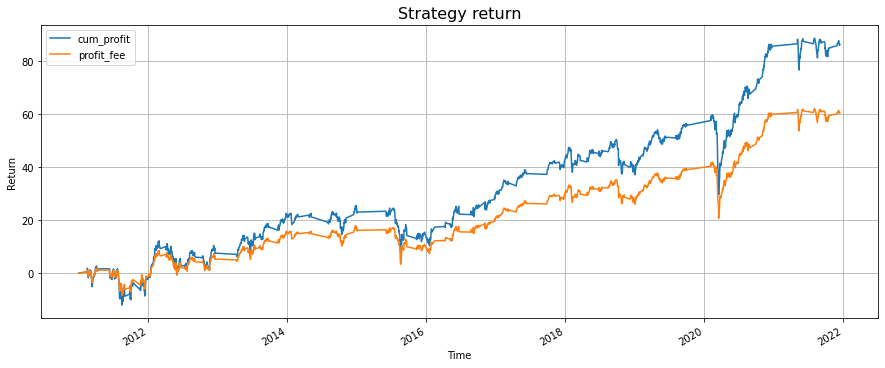

In [ ]:
# strategy_dailyTest

fund = 100 #初始有100元本金
money = 100 #每次投入100元
feeRate = 0.003

first = 0 ##除了第一筆之外，只紀錄出場的時間點
BS = None ##紀錄現在的狀態是做多還做空
stopEarn = 0
stopLoss = 0

#--------# 設定進場標準
goal_NDI = np.percentile(df['NDI'], 80)
goal_ADX = df['ADX'].mean()

#--------# 記錄買入、賣出時間點
buy = []
sell = []
sell_win = []
sell_lose = []
#--------# 
timeList = [] 
profit_list = [0]
profit_fee_list = [0]


for i in range(len(df)):

    if first == 0:
        timeList.append(df.index[i+1])
        first = 1
        continue

    if i == len(df)-1: # last trading day
        break
      


      # buy : when NDI > goal and ADX > goal => Buy
    if df['NDI'][i] > goal_NDI and df['ADX'][i] > goal_ADX and BS == None:
        BS = 'B' 
        temp_0 = df['close'][i+1] 
        buy.append(i+1)
        continue


      # when PDI > NDI => get ready for sell if NDI cross PDI again(about to fall)
    if df['PDI'][i] > df['NDI'][i] and BS == 'B':
        BS = 'Ready' 

      # sell : when NDI > PDI => sell
    if df['NDI'][i] > df['PDI'][i] and BS == 'Ready':
        winLose = tempSize * (df['close'][i+1] - temp_0) 

        if winLose >= 0:
          sell_win.append(i+1)
        else:
          sell_lose.append(i+1)

        temp = df['close'][i] 
        tempSize = money / temp
        profit = tempSize * (df['close'][i+1] - temp)
        profit_list.append(profit)
        timeList.append(df.index[i])
        profit_fee = profit * (1 - money * feeRate) # -money*feeRate 
        profit_fee_list.append(profit_fee)

        sell.append(i+1)
        BS = None

      # record profit
    if BS == 'B' or BS == 'Ready':
        temp = df['close'][i] 
        tempSize = money / temp
        profit = tempSize * (df['close'][i+1] - temp)
        profit_list.append(profit)
        timeList.append(df.index[i])
        profit_fee = profit * (1 - money * feeRate) # -money*feeRate 
        profit_fee_list.append(profit_fee)
    
equity = pd.DataFrame({'profit':profit_list, 'cum_profit':np.cumsum(profit_list),  'profit_fee':np.cumsum(profit_fee_list)}, index=timeList)

# plot
equity['cum_profit'].plot(grid=True, figsize=(15, 6));
equity['profit_fee'].plot(grid=True, figsize=(15, 6));
plt.legend()
plt.ylabel('Return')
plt.xlabel('Time')
plt.title('Strategy return',fontsize  = 16);

Text(0.5, 1.0, 'Price Movement')

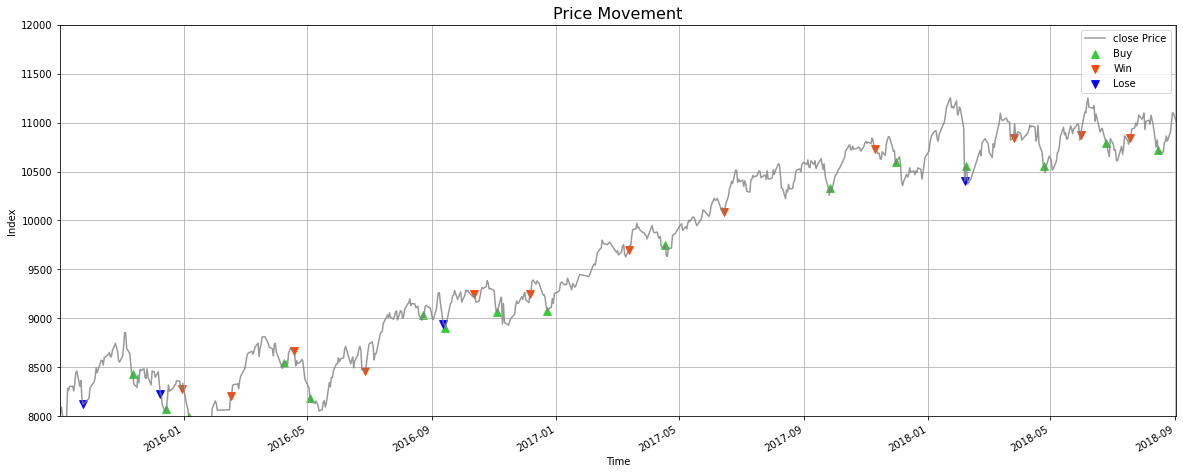

In [ ]:
# 實際交易位置

# print('buy:{}'.format(df.iloc[buy].index))
# print('sell:{}'.format(df.iloc[sell].index))

fig, ax = plt.subplots(figsize = (20,8))
df['close'].plot(label = 'close Price', ax = ax, c = 'gray', grid=True, alpha=0.8)
plt.scatter(df['close'].iloc[buy].index, df['close'].iloc[buy], c = 'limegreen', label = 'Buy', marker='^', s=60)
# plt.scatter(df['close'].iloc[sell].index, df['close'].iloc[sell],c = 'orangered', label = 'Sell', marker='v', s=60)
plt.scatter(df['close'].iloc[sell_win].index, df['close'].iloc[sell_win], c = 'orangered', label = 'Win', marker='v', s=60)
plt.scatter(df['close'].iloc[sell_lose].index, df['close'].iloc[sell_lose], c = 'b', label = 'Lose', marker='v', s=60)

plt.xlim('2015-09-01', '2018-09-01')
plt.ylim(8000, 12000)

plt.legend()
plt.ylabel('Index')
plt.xlabel('Time')
plt.title('Price Movement',fontsize  = 16)


Text(0.5, 0, 'Time')

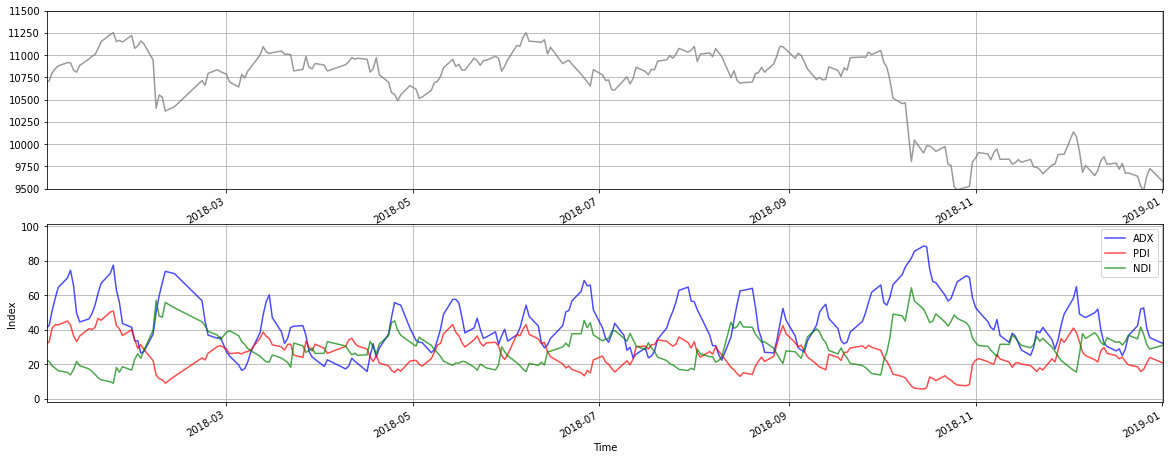

In [ ]:
# 實際交易位置

#ax[0]
fig, ax = plt.subplots(2, 1, figsize = (20,8))
df['close'].plot(label = 'close Price', ax = ax[0], c = 'gray', grid=True, alpha=0.8)

# ax[1]
df['ADX'].plot(label = 'ADX', ax = ax[1], c = 'b', grid=True, alpha=0.7)
df['PDI'].plot(label = 'PDI', ax = ax[1], c = 'r', grid=True, alpha=0.7)
df['NDI'].plot(label = 'NDI', ax = ax[1], c = 'g', grid=True, alpha=0.7)

period = '2018-01-01', '2019-01-01'
price = 9500, 11500

ax[0].set_xlim(period)
ax[1].set_xlim(period)
ax[0].set_ylim(price)

plt.legend()
plt.ylabel('Index')
plt.xlabel('Time')
# plt.title('DMI Indicator',fontsize  = 16)


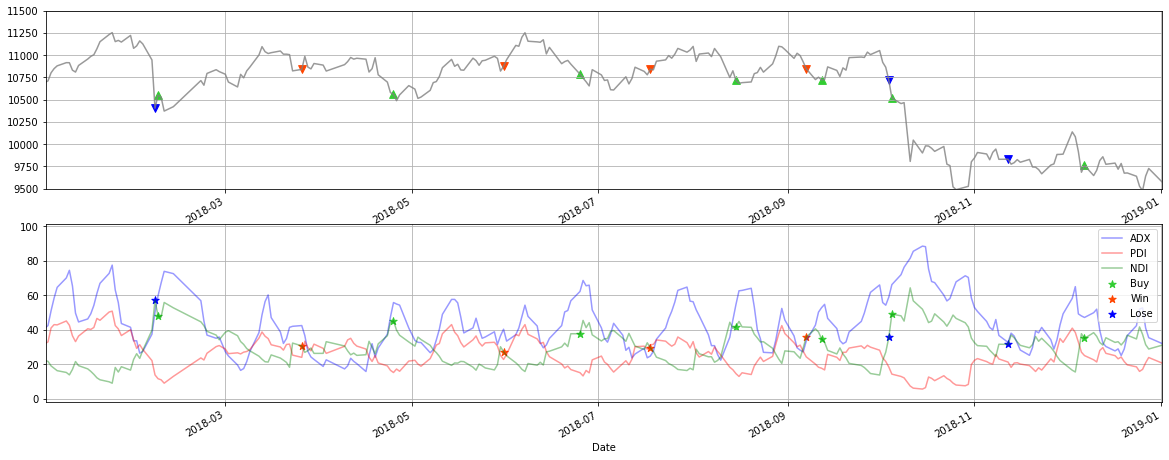

In [ ]:
# 實際交易位置

# print('buy:{}'.format(df.iloc[buy].index))
# print('sell:{}'.format(df.iloc[sell].index))

#ax[0]
fig, ax = plt.subplots(2, 1, figsize = (20,8))
df['close'].plot(label = 'close Price', ax = ax[0], c = 'gray', grid=True, alpha=0.8)
ax[0].scatter(df['close'].iloc[buy].index, df['close'].iloc[buy], c = 'limegreen', label = 'Buy', marker='^', s=60)
ax[0].scatter(df['close'].iloc[sell_win].index, df['close'].iloc[sell_win], c = 'orangered', label = 'Win', marker='v', s=60)
ax[0].scatter(df['close'].iloc[sell_lose].index, df['close'].iloc[sell_lose], c = 'b', label = 'Lose', marker='v', s=60)

# ax[1]
df['ADX'].plot(label = 'ADX', ax = ax[1], c = 'b', grid=True, alpha=0.4)
df['PDI'].plot(label = 'PDI', ax = ax[1], c = 'r', grid=True, alpha=0.4)
df['NDI'].plot(label = 'NDI', ax = ax[1], c = 'g', grid=True, alpha=0.4)
ax[1].scatter(df['close'].iloc[buy].index, df['NDI'].iloc[buy], c = 'limegreen', label = 'Buy', marker='*', s=60)
ax[1].scatter(df['close'].iloc[sell_win].index, df['NDI'].iloc[sell_win], c = 'orangered', label = 'Win', marker='*', s=60)
ax[1].scatter(df['close'].iloc[sell_lose].index, df['NDI'].iloc[sell_lose], c = 'b', label = 'Lose', marker='*', s=60)

period = '2018-01-01', '2019-01-01'
price = 9500, 11500

ax[0].set_xlim(period)
ax[1].set_xlim(period)
ax[0].set_ylim(price)

plt.legend()
# plt.ylabel('Index')
# plt.xlabel('Time')
# plt.title('Price Movement',fontsize  = 16)


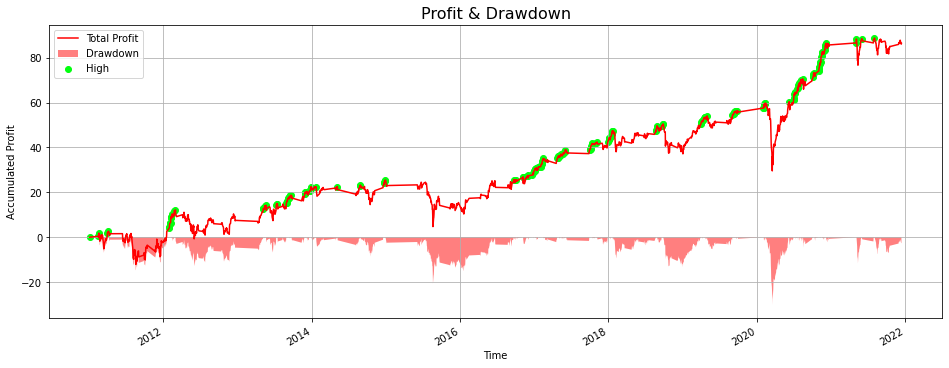

In [ ]:
# 未實現損益

equity['equity'] = equity['cum_profit'] + fund
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax()

fig, ax = plt.subplots(figsize = (16,6))

high_index = equity[equity['cum_profit'].cummax() == equity['cum_profit']].index
equity['cum_profit'].plot(label = 'Total Profit', ax = ax, c = 'r', grid=True)
plt.fill_between(equity['drawdown'].index, equity['drawdown'], 0, facecolor  = 'r', label = 'Drawdown', alpha=0.5)
plt.scatter(high_index, equity['cum_profit'].loc[high_index],c = '#02ff0f', label = 'High')

plt.legend()
plt.ylabel('Accumulated Profit')
plt.xlabel('Time')
plt.title('Profit & Drawdown',fontsize  = 16);

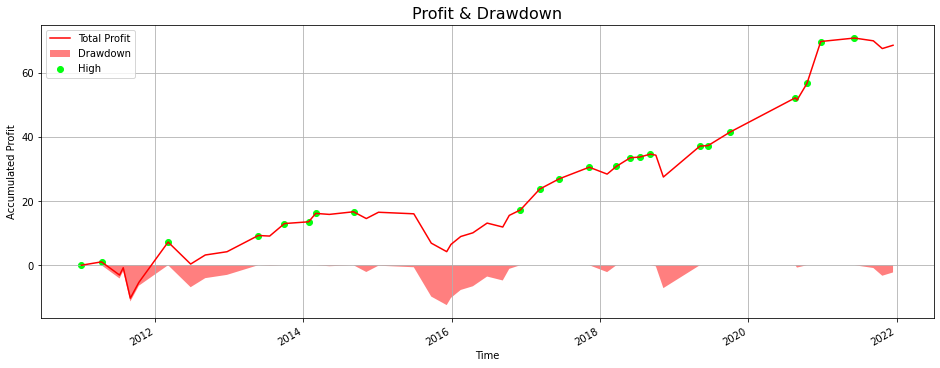

In [ ]:
# 已實現損益

equity['equity'] = equity['profit_fee'] + fund
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax()

fig, ax = plt.subplots(figsize = (16,6))

high_index = equity[equity['profit_fee'].cummax() == equity['profit_fee']].index
equity['profit_fee'].plot(label = 'Total Profit', ax = ax, c = 'r', grid=True)
plt.fill_between(equity['drawdown'].index, equity['drawdown'], 0, facecolor  = 'r', label = 'Drawdown', alpha=0.5)
plt.scatter(high_index, equity['profit_fee'].loc[high_index],c = '#02ff0f', label = 'High')

plt.legend()
plt.ylabel('Accumulated Profit')
plt.xlabel('Time')
plt.title('Profit & Drawdown',fontsize  = 16);

In [ ]:
equity

,profit,cum_profit,profit_fee,equity,drawdown_percent,drawdown
2011-01-04 00:00:00+08:00,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
2011-02-14 00:00:00+08:00,0.419783,0.419783,0.293848,100.419783,0.000000,0.000000
2011-02-15 00:00:00+08:00,-0.102841,0.316941,0.221859,100.316941,-0.001024,-0.102841
2011-02-16 00:00:00+08:00,-0.333758,-0.016817,-0.011772,99.983183,-0.004348,-0.436599
2011-02-17 00:00:00+08:00,1.842040,1.825224,1.277656,101.825224,0.000000,0.000000
...,...,...,...,...,...,...
2021-12-08 00:00:00+08:00,0.458150,87.752757,61.426930,187.752757,-0.005082,-0.959040
2021-12-09 00:00:00+08:00,-0.490448,87.262309,61.083617,187.262309,-0.007681,-1.449488
2021-12-10 00:00:00+08:00,-0.329066,86.933243,60.853270,186.933243,-0.009425,-1.778554
2021-12-13 00:00:00+08:00,-0.946838,85.986405,60.190483,185.986405,-0.014442,-2.725392


In [ ]:
cum_profit = equity['cum_profit'].iloc[-1]
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
mdd = abs(equity['drawdown_percent'].min())
ret = (equity['equity'][-1]/equity['equity'][0]) - 1
mean_ret = equity['cum_profit'].mean()
std = equity['cum_profit'].std()

# holding period
duration = []

for i in range(len(buy)):
  x = sell[i] - buy[i]
  duration.append(x)

avg_hldPeriod = np.array(duration).mean()


# performance
calmarRatio = ret / mdd
sharpe_ratio = (mean_ret/std)
winRate = len(sell_win)/(len(sell_win) + len(sell_lose))

print(f'cum_return: ${np.round(cum_profit,2)}%')
print(f'mdd: {np.round(mdd,3)*100}%')
print(f'ret: {np.round(ret,3)*100}%')
print(f'average holding period: {np.round(avg_hldPeriod,2)} days')
print(f'calmarRatio: {np.round(calmarRatio,2)}')
print(f'sharpeRatio: {np.round(sharpe_ratio,2)}')
print(f'winRate: {np.round(winRate,4)*100}%')


cum_return: $86.33%
mdd: 18.9%
ret: 86.3%
average holding period: 30.8 days
calmarRatio: 4.56
sharpeRatio: 1.28
winRate: 69.39%
